**Import Libraries**

In [333]:
import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.
import matplotlib.pyplot as plt                                         # Used for plotting
import seaborn as sns   
import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Data Load and Summary**

In [ ]:
data=pd.read_csv(r'Tweets.csv')

In [335]:
data.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [336]:
data.tail(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different flight to Chicago.,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to #BlackBerry10,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [337]:
data.shape

(14640, 15)

In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [339]:
data.describe(include='all')

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
count,1.464000e+04,14640,14640.000000,9178,10522.000000,14640,40,14640,32,14640.000000,14640,1019,14640,9907,9820
unique,NaN,3,NaN,10,NaN,6,3,7701,13,NaN,14427,832,14247,3081,85
top,NaN,negative,NaN,Customer Service Issue,NaN,United,negative,JetBlueNews,Customer Service Issue,NaN,@united thanks,"[0.0, 0.0]",2015-02-24 09:54:34 -0800,"Boston, MA",Eastern Time (US & Canada)
freq,NaN,9178,NaN,2910,NaN,3822,32,63,12,NaN,6,164,5,157,3744
mean,5.692184e+17,NaN,0.900169,NaN,0.638298,NaN,NaN,NaN,NaN,0.082650,NaN,NaN,NaN,NaN,NaN
std,7.791112e+14,NaN,0.162830,NaN,0.330440,NaN,NaN,NaN,NaN,0.745778,NaN,NaN,NaN,NaN,NaN
min,5.675883e+17,NaN,0.335000,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,5.685592e+17,NaN,0.692300,NaN,0.360600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,5.694779e+17,NaN,1.000000,NaN,0.670600,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,5.698905e+17,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN


**Initial Observation:**
- There are 15 columns and 14640 tweets. Some of the columns has null values which we can later to see if we need to treat those and leave as it is. 

- There are total 3 sentiments where there are more number of negative sentiments. 
 
- 9178 are negative comments and we also have same number of negative reasons. Hence we can analyze the negative reasons. 

- The dataset has data of 6 airlines out of which Majority of reviews are for United Airlines

- Majority of negative reason is Customer Service issue

- People are tweeting are from various locations in different timezones. 



In [340]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- We are mainly looking for airline_sentiment and text columns for this usecase. Hence it is not required to treat any of the other null columns. 

## **EDA**

**Plot the distribution of all tweets among each airline & plot the distribution of sentiment across all the tweets.**

In [341]:
#Function definition ofr stacked barplot
def stacked_barplot(data, col_name, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    col_name: independent variable or feature
    target: target variable
    """
    count = data[col_name].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[col_name], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[col_name], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [342]:
data['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [343]:
data['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

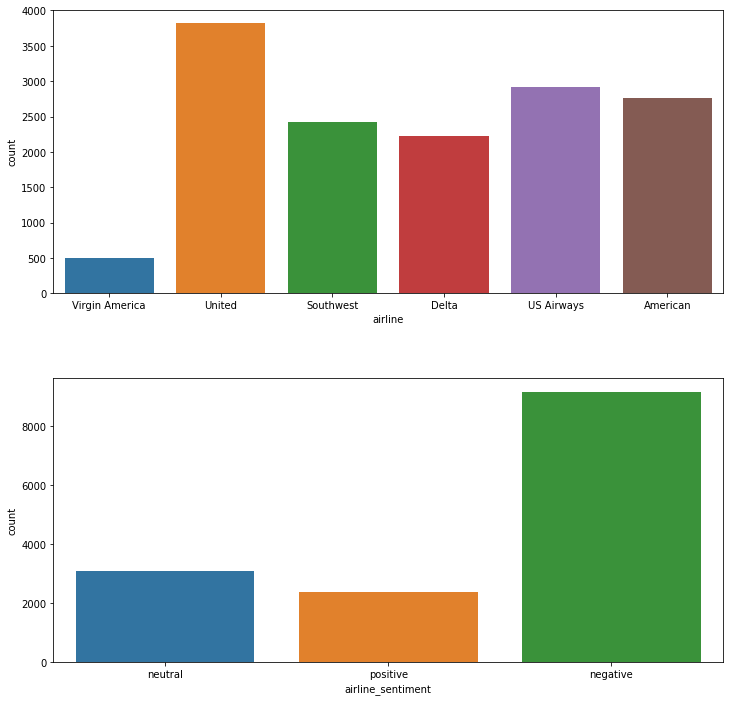

In [344]:
fig, ax = plt.subplots(2,1,figsize=(12,12))
plt.subplots_adjust(hspace=0.3)

sns.countplot(x='airline', data=data, ax=ax[0])
sns.countplot(x='airline_sentiment', data=data, ax=ax[1])

plt.show()


- Out of 14640 reviews, there are more number of Negative reviews, almost > 9000.
- Count of Positive and Neutral reviews are < 4000. 
- There are more than 3500 reviews for United Airlines where as <=500 reviews for Virgin America. 

**Plot the distribution of Sentiment of tweets for each airline & plot the distribution of all the negative reasons.**

airline_sentiment  negative  neutral  positive    All
airline                                              
All                    9178     3099      2363  14640
Southwest              1186      664       570   2420
Delta                   955      723       544   2222
United                 2633      697       492   3822
American               1960      463       336   2759
US Airways             2263      381       269   2913
Virgin America          181      171       152    504
------------------------------------------------------------------------------------------------------------------------


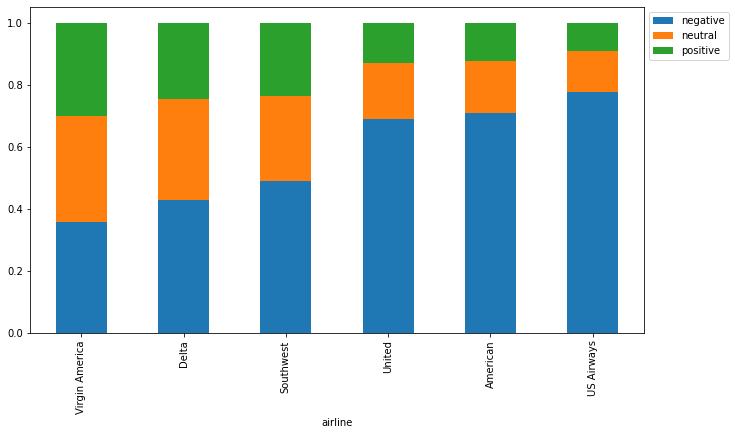

In [345]:
stacked_barplot(data, "airline", "airline_sentiment")

Majority of negative reviews are for United Airlines. Top second is US Airways for negative reviews

In [346]:
data['negativereason'].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

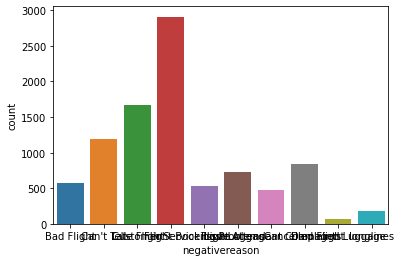

In [348]:
plt.figsize = (50,50)

sns.countplot(x='negativereason', data=data, orient='v')
plt.show()

Most of the negative reviews are for Customer Service Issue and late flight. 
Very low reason is Damaged luggage which is good in the sense that airlines are not damaging luggages during transit.

In [349]:
data['tweet_location'].value_counts()

Boston, MA              157
New York, NY            156
Washington, DC          150
New York                127
USA                     126
                       ... 
Seattle (duh!)            1
South ~O-H-I-O~ Side      1
Pocono Raceway            1
denver, co                1
Nigeria,lagos             1
Name: tweet_location, Length: 3081, dtype: int64

Majority of the reviews are coming from Bostome, New York and Washington DC. 
Majority reviews are from US users - Could be because data is related to US airlines. 

**Plot the word cloud graph of tweets for positive, negative and neutral sentiment separately**

In [350]:
def show_wordcloud(data, text_column,  title):
    summary = []
    for row in data[text_column]:
      summary.append(nltk.word_tokenize(row))
    summary = data.apply(lambda row: nltk.word_tokenize(row[text_column]), axis=1) # Tokenization of data
    text = ' '.join(summary.astype(str).tolist())                 # Converting Summary column into list
    
    fig_wordcloud = wordcloud.WordCloud(background_color='white',          # Setting the different parameter of stopwords
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)                             
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

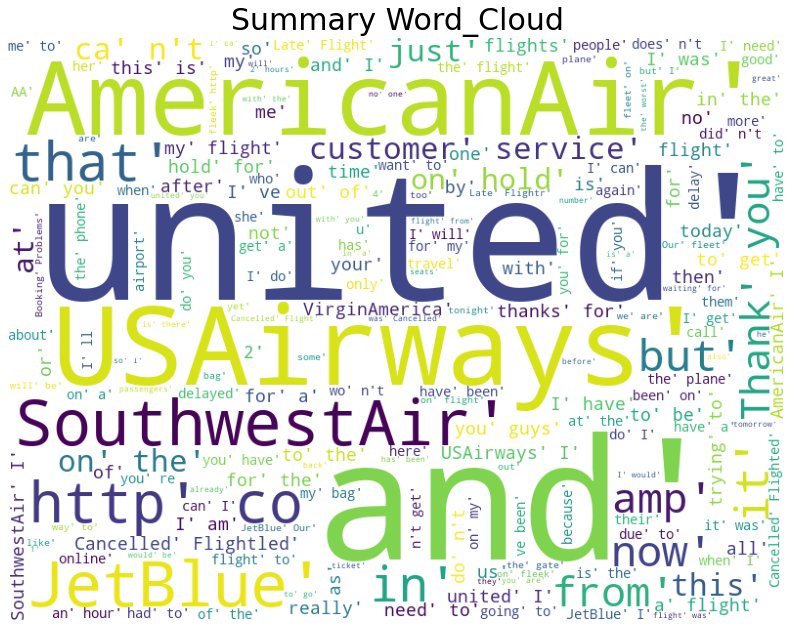

In [351]:
#All word cloud
show_wordcloud(data,'text', 'Summary Word_Cloud')

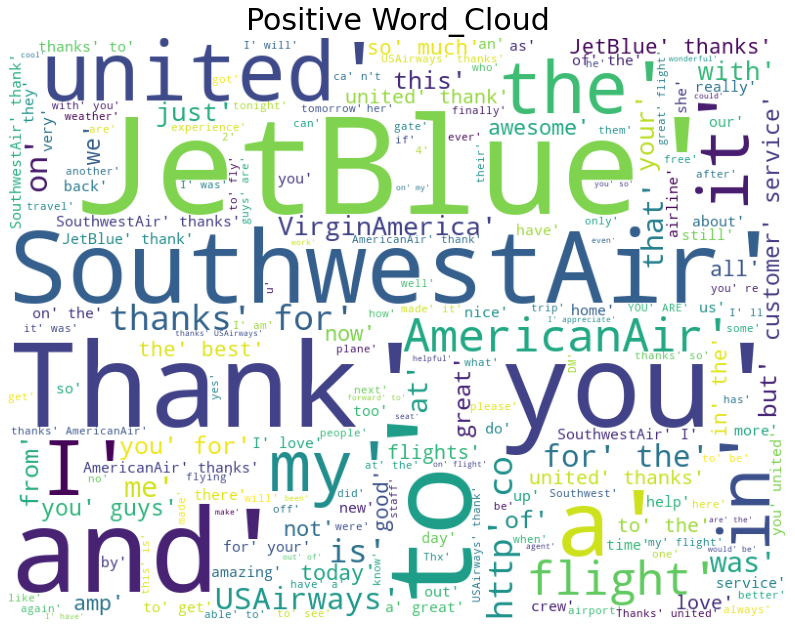

In [352]:
#Positive Word Cloud
show_wordcloud(data[data['airline_sentiment']=='positive'],'text','Positive Word_Cloud')

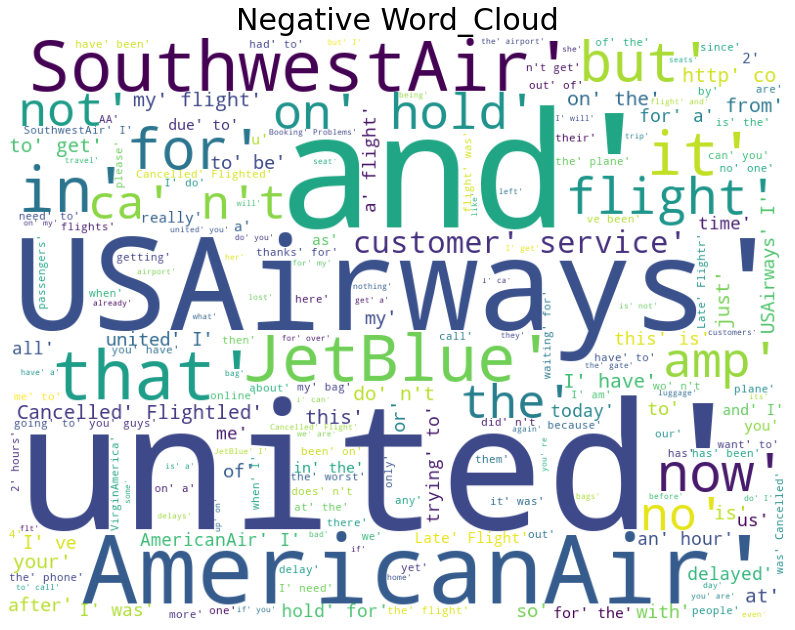

In [353]:
#Negative Word Cloud
show_wordcloud(data[data['airline_sentiment']=='negative'],'text','Negative Word_Cloud')

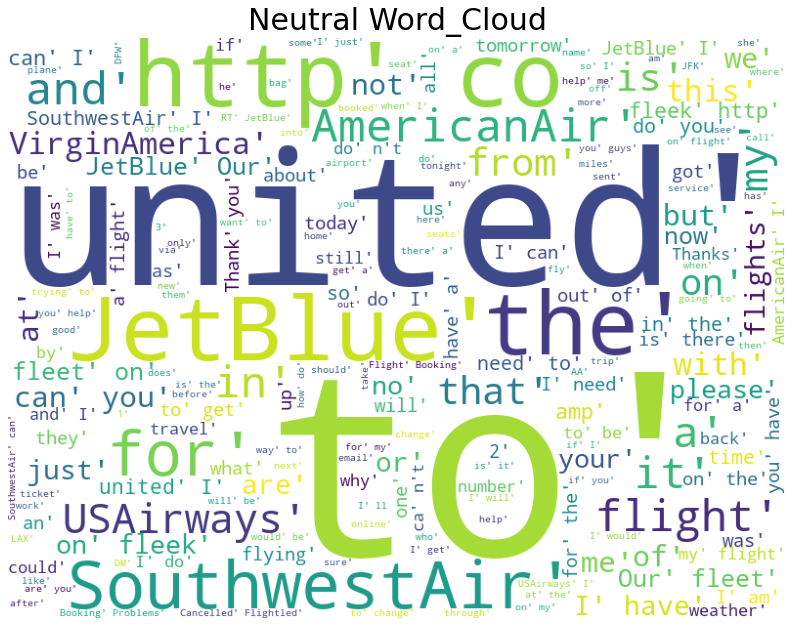

In [354]:
#Neutral Word Cloud
show_wordcloud(data[data['airline_sentiment']=='neutral'],'text','Neutral Word_Cloud')

- Like we saw earlier, the negative reviews are for United, US Airways the most,  hence you can see those words in Negative word cloud
- Most positive reviews are for Southwest. 
- For Jetblue, Negative and neutral are similar. 
- Even though we saw, customer service issue is major reason for negative comments, people are giving positive reviews for Best customer service as well. This is really interesting point to notice. 
- These clouds are without preprocessing, hence you will see lot of stop words and unnecessary words that are shown. I will show cloud again after preprocessing to get a better idea. 

Text(0.5, 0.98, 'Characters in message')

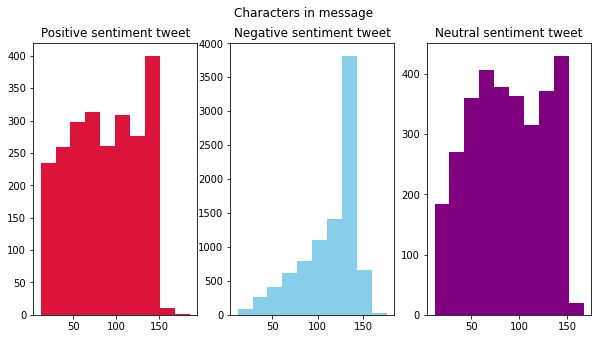

In [355]:
#Number of characters in tweets
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.len()
ax3.hist(tweet_len,color='purple')
ax3.set_title('Neutral sentiment tweet')
fig.suptitle('Characters in message')

Text(0.5, 0.98, 'Words in message')

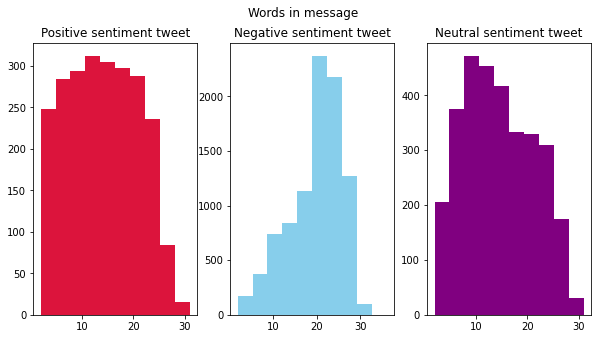

In [356]:
#Number of words in tweets
fig,(ax1,ax2, ax3) = plt.subplots(1,3,figsize=(10,5))
tweet_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(tweet_len,color='crimson')
ax1.set_title('Positive sentiment tweet')
tweet_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(tweet_len,color='skyblue')
ax2.set_title('Negative sentiment tweet')
tweet_len = data[data['airline_sentiment']=='neutral']['text'].str.split().map(lambda x: len(x))
ax3.hist(tweet_len,color='purple')
ax3.set_title('Neutral sentiment tweet')
fig.suptitle('Words in message')

For Positive and neutral words, people usually write from >0 to <-30 words. But for negative, people usually write from 15-25 words the most. 

### **Key Observation and insights:**

- Since United Airlines has majority of reviews in this dataset, it has most negative reviews also. 
- Most positive reviews are for Southwest. 
- For Jetblue, Negative and neutral are similar. 
- Even though we saw, customer service issue is major reason for negative comments, people are giving positive reviews for Best customer service as well. This is really interesting point to notice. People give good reviews for customer service. Hence, Airlines should focus on Customer service to improve their brand.
- The late flight, cancelled flight or bad flight are other reasons for negative reviews. For some unforseen reasons, flights are getting delayed or cancelled, thats understandable. But if every time the  flight is not on time, that customers will be frustrated. Airlines should focus on increasing more staff to do pre-boarding work, maintainence work, so that flight will not delay for those reasons. 
- The Flight bookings should be made easy. More options should be given online like reschedule, cancel, introduce chatbots for simple Q&A, etc. 

### **Understanding Data Columns:**

Drop all other columns except “text” and “airline_sentiment” as those are not needed for our model.

Check the shape of the data

Print the first 5 rows of data.

In [382]:
dataset = data.drop(['tweet_id', 'airline_sentiment_confidence', 'negativereason', 'negativereason_confidence', 'airline', 'airline_sentiment_gold','name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone'], axis=1)

In [358]:
dataset.shape

(14640, 2)

In [383]:
dataset.head(5)

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [384]:
dataset.tail(5)

,airline_sentiment,text
14635,positive,@AmericanAir thank you we got on a different flight to Chicago.
14636,negative,@AmericanAir leaving over 20 minutes Late Flight. No warnings or communication until we were 15 minutes Late Flight. That's called shitty customer svc
14637,neutral,@AmericanAir Please bring American Airlines to #BlackBerry10
14638,negative,"@AmericanAir you have my money, you change my flight, and don't answer your phones! Any other suggestions so I can make my commitment??"
14639,neutral,@AmericanAir we have 8 ppl so we need 2 know how many seats are on the next flight. Plz put us on standby for 4 people on the next flight?


In [385]:
#Checking the full text columns to see what all preprocessing steps are required.
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data['text'].head(10)   

0                                                                                                         @VirginAmerica What @dhepburn said.
1                                                                    @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                                     @VirginAmerica I didn't today... Must mean I need to take another trip!
3              @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
4                                                                                     @VirginAmerica and it's a really big bad thing about it
5    @VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA
6                                                             @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
7     

In [386]:
data['text'].tail(10) 

14630                                                                                                                               @AmericanAir Thanks! He is.
14631                                     @AmericanAir thx for nothing on getting us out of the country and back to US. Broken plane? Come on. Get another one.
14632                “@AmericanAir: @TilleyMonsta George, that doesn't look good. Please follow this link to start the refund process: http://t.co/4gr39s91Dl”😂
14633             @AmericanAir my flight was Cancelled Flightled, leaving tomorrow morning. Auto rebooked for a Tuesday night flight but need to arrive Monday.
14634                                                                                                                @AmericanAir right on cue with the delays👌
14635                                                                                           @AmericanAir thank you we got on a different flight to Chicago.
14636    @AmericanAir leaving over 20 mi

# Data Pre - Processing

Based on above analysis of data, I am going to perform following preprocessing steps. 
*   HTML Parsing
*   Contraction
*   Remove Hyper links using re
*   Word Tokenization   
*   Encoding i.e. removing non ASCII characters which will remove smileys
*   Conversion to lowercase
*   Remove the numbers
*   Removal of stopwords
*   Check if every tweet is starting from @ariline name, then remove it. We dont need to identify sentiment.
*   Removal of Punctuations. 
*   Removal of Special Characters(For e.g. \n,\t, & amp; characters) 
*   Lemmatize or stemming. 
*   Joining the words to form a sentence

In [387]:
#Function Definition of all preprocessing steps

from nltk.corpus import stopwords 
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))  

lemmatizer = WordNetLemmatizer()

def tokenize(sent):
    return nltk.word_tokenize(sent)

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def strip_html(text):
  """HTML parsing"""
  soup = BeautifulSoup(text, "html.parser")                    
  return soup.get_text()


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_hyperlink(text):
  """remove the URL present in the text"""
  return re.sub(r'(http)?|(https)?://\S+', '', text)
  

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def check_and_remove_first_word(words):
  """All tweets are starting from @airline name. This is not required for model building. Hence removing those words from the text."""
  if words[0].startswith('@'):
    return words[2:]
  return words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_special_characters(words):
    """Remove special characters such as \n, \t, &amp; from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'(\\n)|(\\t)|(&amp;)', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def remove_numbers(words):
  """Remove digits from the text"""
  new_words = []
  for word in words:
    new_word = re.sub(r'(\d+)', '', word)
    if new_word != '':
      new_words.append(new_word)
  return new_words


def lemmatize_list(words):
  """lemmatize the words"""
  new_words = []
  for word in words:
    new_words.append(lemmatizer.lemmatize(word, pos='v'))
  return new_words

def get_sentence(words):
  """Join the words to form a sentence for model building. """
  return ' '.join(words)

HTML Parsing

In [388]:
dataset['preprocessed'] = dataset['text'].apply(strip_html)
dataset['preprocessed'].head(5)

0                                                                                           @VirginAmerica What @dhepburn said.
1                                                      @VirginAmerica plus you've added commercials to the experience... tacky.
2                                                       @VirginAmerica I didn't today... Must mean I need to take another trip!
3    @VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                       @VirginAmerica and it's a really big bad thing about it
Name: preprocessed, dtype: object

Contractions

In [389]:
dataset['preprocessed'] = dataset['preprocessed'].apply(replace_contractions)
dataset['preprocessed'].head(5)

0                                                                                            @VirginAmerica What @dhepburn said.
1                                                     @VirginAmerica plus you have added commercials to the experience... tacky.
2                                                       @VirginAmerica I did not today... Must mean I need to take another trip!
3    @VirginAmerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                       @VirginAmerica and it is a really big bad thing about it
Name: preprocessed, dtype: object

Remove URLs

In [390]:
dataset['preprocessed'] = dataset['preprocessed'].apply(remove_hyperlink)
dataset['preprocessed'].head(5)

0                                                                                            @VirginAmerica What @dhepburn said.
1                                                     @VirginAmerica plus you have added commercials to the experience... tacky.
2                                                       @VirginAmerica I did not today... Must mean I need to take another trip!
3    @VirginAmerica it is really aggressive to blast obnoxious "entertainment" in your guests' faces & they have little recourse
4                                                                       @VirginAmerica and it is a really big bad thing about it
Name: preprocessed, dtype: object

Word Tokenize

In [391]:
dataset['preprocessed'] = dataset['preprocessed'].apply(tokenize)
dataset['preprocessed'].head(5)

0                                                                                                              [@, VirginAmerica, What, @, dhepburn, said, .]
1                                                                 [@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                                                                [@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]
3    [@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]
4                                                                                      [@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]
Name: preprocessed, dtype: object

Remove Non ASCII (For e.g. smileys)

In [392]:
dataset['preprocessed'] = dataset['preprocessed'].apply(remove_non_ascii)
dataset['preprocessed'].head(5)

0                                                                                                              [@, VirginAmerica, What, @, dhepburn, said, .]
1                                                                 [@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                                                                [@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]
3    [@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]
4                                                                                      [@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]
Name: preprocessed, dtype: object

Converting into Lower Case

In [393]:
dataset['preprocessed'] = dataset['preprocessed'].apply(to_lowercase)
dataset['preprocessed'].head(5)

0                                                                                                              [@, virginamerica, what, @, dhepburn, said, .]
1                                                                 [@, virginamerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                                                                [@, virginamerica, i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]
3    [@, virginamerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]
4                                                                                      [@, virginamerica, and, it, is, a, really, big, bad, thing, about, it]
Name: preprocessed, dtype: object

Remove Numbers

In [394]:
dataset['preprocessed'] = dataset['preprocessed'].apply(remove_numbers)
dataset['preprocessed'].head(5)

0                                                                                                              [@, virginamerica, what, @, dhepburn, said, .]
1                                                                 [@, virginamerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]
2                                                                [@, virginamerica, i, did, not, today, ..., must, mean, i, need, to, take, another, trip, !]
3    [@, virginamerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]
4                                                                                      [@, virginamerica, and, it, is, a, really, big, bad, thing, about, it]
Name: preprocessed, dtype: object

Removal of stopwords

In [395]:
dataset['preprocessed'] = dataset['preprocessed'].apply(remove_stopwords)
dataset['preprocessed'].head(5)

0                                                                                  [@, virginamerica, @, dhepburn, said, .]
1                                                   [@, virginamerica, plus, added, commercials, experience, ..., tacky, .]
2                                             [@, virginamerica, not, today, ..., must, mean, need, take, another, trip, !]
3    [@, virginamerica, really, aggressive, blast, obnoxious, ``, entertainment, '', guests, ', faces, &, little, recourse]
4                                                                               [@, virginamerica, really, big, bad, thing]
Name: preprocessed, dtype: object

Check if every tweet is starting from @ariline name, then remove it. We dont need to identify sentiment.

In [396]:
dataset['preprocessed'] = dataset['preprocessed'].apply(check_and_remove_first_word)
dataset['preprocessed'].head(5)

0                                                                                  [@, dhepburn, said, .]
1                                                   [plus, added, commercials, experience, ..., tacky, .]
2                                             [not, today, ..., must, mean, need, take, another, trip, !]
3    [really, aggressive, blast, obnoxious, ``, entertainment, '', guests, ', faces, &, little, recourse]
4                                                                               [really, big, bad, thing]
Name: preprocessed, dtype: object

Removal of Punctuations.


In [397]:
dataset['preprocessed'] = dataset['preprocessed'].apply(remove_punctuation)
dataset['preprocessed'].head(5)

0                                                                          [dhepburn, said]
1                                             [plus, added, commercials, experience, tacky]
2                                       [not, today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]
4                                                                 [really, big, bad, thing]
Name: preprocessed, dtype: object

Removal of Special Characters(For e.g. \n,\t, & amp; characters)


In [398]:
dataset['preprocessed'] = dataset['preprocessed'].apply(remove_special_characters)
dataset['preprocessed'].head(5)

0                                                                          [dhepburn, said]
1                                             [plus, added, commercials, experience, tacky]
2                                       [not, today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, entertainment, guests, faces, little, recourse]
4                                                                 [really, big, bad, thing]
Name: preprocessed, dtype: object

Lemmatizing

In [399]:
dataset['preprocessed'] = dataset['preprocessed'].apply(lemmatize_list)
dataset['preprocessed'].head(5)

0                                                                          [dhepburn, say]
1                                              [plus, add, commercials, experience, tacky]
2                                      [not, today, must, mean, need, take, another, trip]
3    [really, aggressive, blast, obnoxious, entertainment, guests, face, little, recourse]
4                                                                [really, big, bad, thing]
Name: preprocessed, dtype: object

Sentence formation

In [400]:
dataset['preprocessed'] = dataset['preprocessed'].apply(get_sentence)
dataset['preprocessed'].head(10)

0                                                                   dhepburn say
1                                          plus add commercials experience tacky
2                                     not today must mean need take another trip
3    really aggressive blast obnoxious entertainment guests face little recourse
4                                                           really big bad thing
5               seriously would pay flight seat not play really bad thing fly va
6                              yes nearly every time fly vx ear worm not go away
7                           really miss prime opportunity men without hat parody
8                                                                  well notbut d
9                                                   amaze arrive hour early good
Name: preprocessed, dtype: object

**Plot the word cloud for positive, negative and neutral sentiments on preprocessed text**

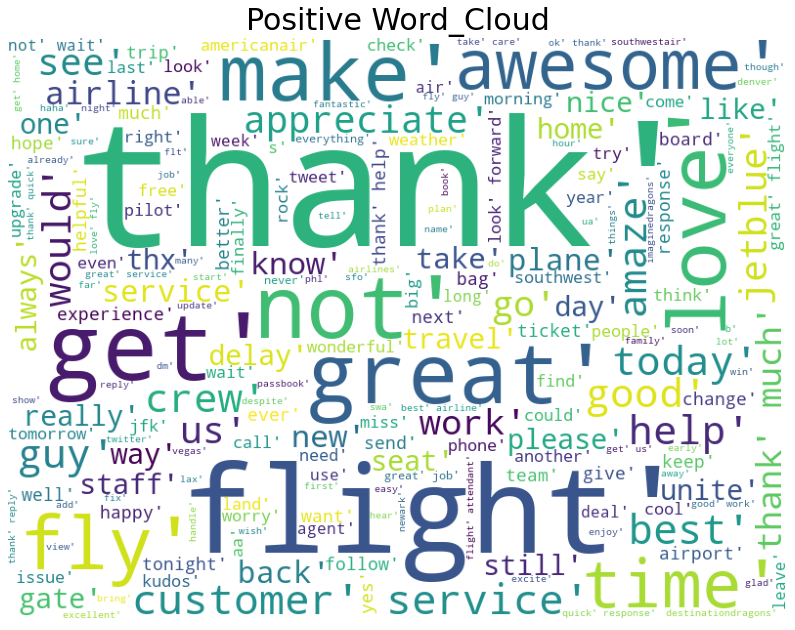

In [401]:
show_wordcloud(dataset[dataset['airline_sentiment']=='positive'],'preprocessed','Positive Word_Cloud')

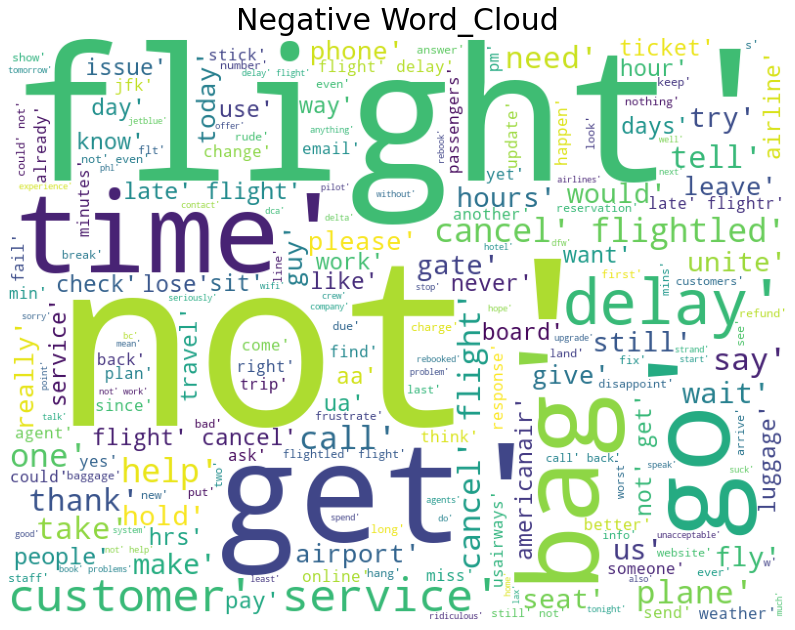

In [402]:
show_wordcloud(dataset[dataset['airline_sentiment']=='negative'],'preprocessed','Negative Word_Cloud')

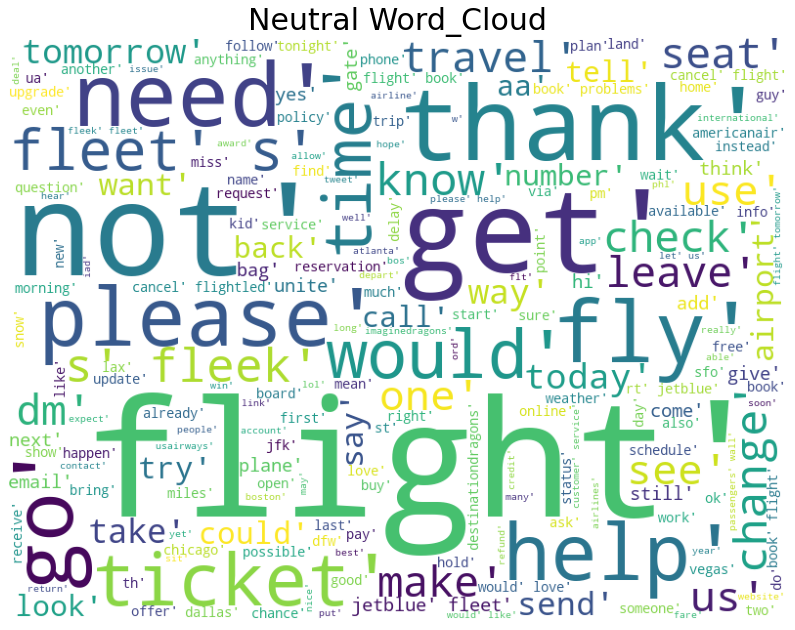

In [403]:
show_wordcloud(dataset[dataset['airline_sentiment']=='neutral'],'preprocessed','Neutral Word_Cloud')

**Data Preparation for Model Building**

In [404]:
#dropping text column from dataset as we already stored prepropessed text in preprocess column
dataset = dataset.drop(['text'], axis=1)

In [405]:
dataset.head(5)

,airline_sentiment,preprocessed
0,neutral,dhepburn say
1,positive,plus add commercials experience tacky
2,neutral,not today must mean need take another trip
3,negative,really aggressive blast obnoxious entertainment guests face little recourse
4,negative,really big bad thing


In [407]:
labels = dataset['airline_sentiment']

# Vectorization, Model Building, Model Tuning and Evaluation

### CountVectorizer

In [408]:
# Vectorization (Convert text data to numbers).
bow_vec = CountVectorizer(max_features=3000)                # Keep only 3000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(dataset['preprocessed'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [409]:
#Aplit data into train and test set
X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.2, random_state=1)

In [410]:
data_features.shape

(14640, 3000)

**Build Random Forest Classifier**

In [411]:
forest = RandomForestClassifier(n_estimators=5, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=5, n_jobs=4)
0.7260928961748634


In [412]:
base_ln = [x for x in range(1, 20)]

Optimizing the parameter: Number of trees in the random forest model(n_estimators)

In [413]:
# Finding optimal number of base learners using k-fold CV ->

cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

**Optimize Random Forest Classifier**

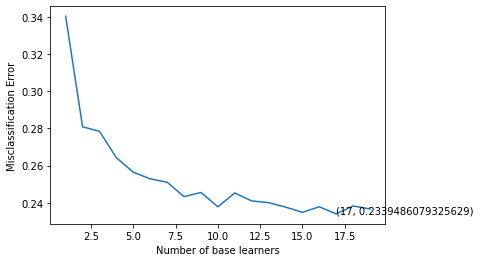

In [414]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [415]:
print(optimal_learners)

# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

17


0.757172131147541

In [416]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[1638  134   54]
 [ 259  289   63]
 [ 127   74  290]]
0.7571721311475409


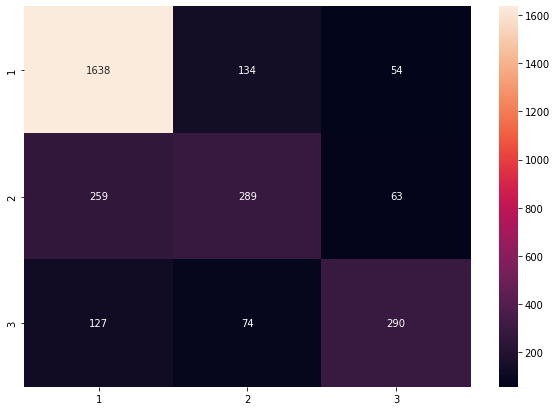

In [417]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"], columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

The model is performing with 75.71% accuracy with count vectorization using Random Forest classifier with 19 estimators

**Print Top 40 features and Word cloud of those 40 features**

In [418]:
#Top 40 Features

all_features = bow_vec.get_feature_names_out()              #Instantiate the feature from the vectorizer
top_features = []
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features.append(all_features[i])

print(top_features)
    



['thank', 'not', 'great', 'delay', 'flight', 'love', 'cancel', 'hold', 'hours', 'wait', 'awesome', 'get', 'amaze', 'bag', 'hour', 'call', 'customer', 'best', 'fleet', 'time', 'would', 'service', 'please', 'go', 'never', 'good', 'worst', 'fly', 'miss', 'plane', 'dm', 'lose', 'make', 'still', 'try', 'help', 'luggage', 'hrs', 'know', 'us']


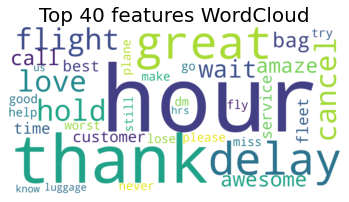

In [419]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(' '.join(top_features))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## TfidfVectorizer

In [420]:
tfidf = TfidfVectorizer(max_features=3000) # Keep only 3000 features as number of features will increase the processing time.
data_features_tfidf = tfidf.fit_transform(dataset['preprocessed'])

data_features_tfidf = data_features_tfidf.toarray()

data_features_tfidf.shape

(14640, 3000)

In [421]:
#Aplit the data in trainign and testing
X_train, X_test, y_train, y_test = train_test_split(data_features_tfidf, labels, test_size=0.2, random_state=1)

**Build Random Forest Classifier**

In [422]:
#Build Randon Forest Classifier with 12 estimators
forest_tfidf = RandomForestClassifier(n_estimators=12, n_jobs=4)

forest_tfidf = forest_tfidf.fit(X_train, y_train)

print(forest_tfidf)

print(np.mean(cross_val_score(forest_tfidf, data_features_tfidf, labels, cv=5)))

RandomForestClassifier(n_estimators=12, n_jobs=4)
0.7545765027322404


In [423]:
forest_tfidf.score(X_test, y_test)

0.7527322404371585

In [424]:
# K - Fold Cross Validation .
cv_scores_tfidf = []
for b in base_ln:
    clf_tfidf = RandomForestClassifier(n_estimators = b)
    scores_tfidf = cross_val_score(clf_tfidf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores_tfidf.append(scores_tfidf.mean())

**Optimize the Random Forest Classifier**

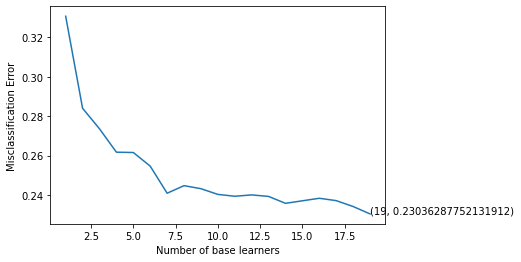

In [425]:
# plotting the error as k increases
error = [1 - x for x in cv_scores_tfidf]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [426]:
# Training the best model and calculating error on test data .
print(optimal_learners)
clf_tfidf = RandomForestClassifier(n_estimators = optimal_learners)
clf_tfidf.fit(X_train, y_train)
clf_tfidf.score(X_test, y_test)

19


0.757172131147541

In [427]:
result_tfidf = clf_tfidf.predict(X_test)

[[1660  126   40]
 [ 272  278   61]
 [ 145   67  279]]
0.7571721311475409


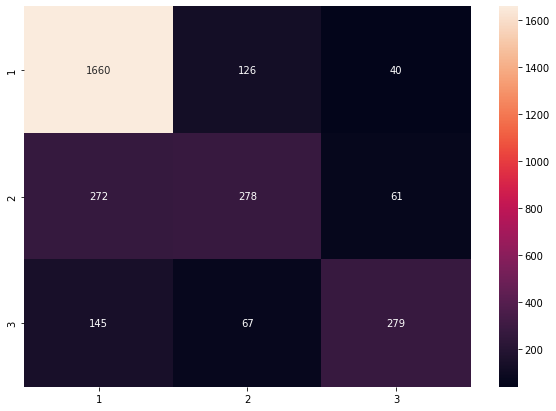

In [428]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result_tfidf =  clf_tfidf.predict(X_test)

conf_mat = confusion_matrix(y_test, result_tfidf)

print(conf_mat)

print(metrics.f1_score(y_test, result_tfidf,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

The model is performing with 75.71% accuracy with tfidf vectorization using Random Forest classifier with 17 estimators.

**Print Top 40 features and Word cloud of those 40 features**

In [309]:
#Top 40 Features

all_features = tfidf.get_feature_names_out()              #Instantiate the feature from the vectorizer
#top_features=''                                            # Addition of top 40 feature into top_feature after training the model
top_features = []
feat=clf_tfidf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features.append(all_features[i])
    #top_features+=all_features[i]
    #top_features+=' '

print(top_features)
    

['thank', 'not', 'delay', 'great', 'flight', 'love', 'hold', 'hours', 'awesome', 'call', 'get', 'wait', 'cancel', 'bag', 'lose', 'service', 'best', 'hour', 'plane', 'hrs', 'worst', 'would', 'time', 'never', 'fly', 'customer', 'still', 'please', 'amaze', 'appreciate', 'good', 'go', 'dm', 'gate', 'try', 'help', 'airline', 'follow', 'one', 'tell']


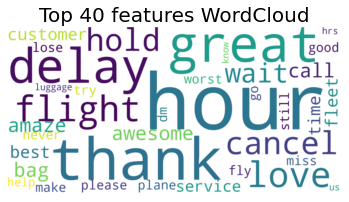

In [429]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(' '.join(top_features))

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

## Conclusion
- I would choose tfidf based model using Random Forest Classifier. This model is giving me 75.71% accuracy to identify sentiments of the user's tweet. 
- This model will be helpful to airlines who want to analyze the sentiments of the users and thus, they can improve their services. 
- Top 40 features show the words like Delay, cancel which belong to negative sentiment where as great, thank, love for positive. 
- This model can be further classify to see the negative reviews which will be helpful to aitlines to understand which area they can focus more. 
- Since United Airlines has majority of reviews in this dataset, it has most negative reviews also. Most positive reviews are for Southwest. United Airlines can check what Southwest are doing good and focus on those areas.
- Customer Service is the major negative reason which all airlines should improve. Better customer service will definetely enhance their business.
- Even though we saw, customer service issue is major reason for negative comments, people are giving positive reviews for Best customer service as well. - This is really interesting point to notice. People give good reviews for customer service. Hence, Airlines should focus on Customer service to improve their brand.
- The late flight, cancelled flight or bad flight are other reasons for negative reviews. For some unforseen reasons, flights are getting delayed or cancelled, thats understandable. But if every time the flight is not on time, that customers will be frustrated. Airlines should focus on increasing more staff to do pre-boarding work, maintainence work, so that flight will not delay for those reasons.
- The Flight bookings should be made easy. More options should be given online like reschedule, cancel, introduce chatbots for simple Q&A, etc.